In [1]:
pip install os-sys

  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached os_sys-2.1.3-py3-none-any.whl (15.5 MB)
  Using cached os_sys-2.1.2-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.1.1-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.1.0-py3-none-any.whl (15.9 MB)
  Using cached os_sys-2.0.9-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.0.8-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.0.7-py3-none-any.whl (14.2 MB)
  Using cached os_sys-2.0.6-py3-none-any.whl (14.2 MB)
  Using cached os_sys-2.0.5-py3-none-any.whl (12.2 MB)
  Using cached os_sys-2.0.4-py3-none-any.whl (50.9 MB)
     |████████████████████████████████| 51.8 MB 65 kB/s s eta 0:00:01
     |████████████████████████████████| 54.1 MB 29 kB/s  eta 0:00:012
     |████████████████████████████████| 10.0 MB 10.0 MB/s eta 0:00:01
  Using cached wifi-0.3.8.tar.gz (11 kB)
  Using cached Django-4.2.9-py3-none-any.whl (8.0 MB)
     |████████████████████████████████| 89 kB 6.0 MB/s  eta 0:00:01
  Using cached Eel-0.1

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2024-01-04 00:14:16.025509: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-04 00:14:16.025547: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11501568/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [5]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2024-01-04 00:14:20.465097: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-04 00:14:20.465144: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-04 00:14:20.465178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2024-01-04 00:14:20.526999: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


TensorShape([60000, 28, 28, 1])

In [6]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [7]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 31s 15ms/step - loss: 0.2246 - accuracy: 0.9319 - val_loss: 0.0815 - val_accuracy: 0.9764
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0561 - val_accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0465 - val_accuracy: 0.9860
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0288 - val_accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0258 - val_accuracy: 0.9924


In [9]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.0441 - accuracy: 0.9865


[0.044080235064029694, 0.9865000247955322]

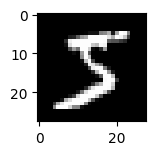

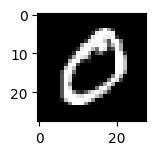

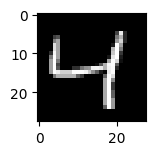

In [10]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [11]:
lenet_5_model.save('lenet_5_model')

2024-01-04 00:16:33.744056: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: lenet_5_model/assets


In [12]:
lenet_5_model.save("my.h5")

In [13]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [14]:
json_model = lenet_5_model.to_json()

In [15]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [16]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [17]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[ 0.21633759,  0.06661004,  0.34044895, -0.19899143,
          -0.02588566,  0.19941607]],

        [[ 0.06090792, -0.31299624,  0.23542234,  0.00420642,
           0.30037293,  0.31359583]],

        [[ 0.03722027, -0.2265251 ,  0.17787877,  0.5492255 ,
           0.2092798 ,  0.1278555 ]],

        [[ 0.12791674, -0.10896187,  0.21192455,  0.19266887,
           0.21050169,  0.15348765]],

        [[ 0.23556118, -0.2701838 ,  0.21337892,  0.04952074,
           0.16052385,  0.14377508]]],


       [[[ 0.03565683,  0.33883753,  0.33268774, -0.10556316,
           0.21142636,  0.24678916]],

        [[-0.5454406 ,  0.07289774,  0.22104289,  0.3403291 ,
           0.24485107,  0.15470423]],

        [[-0.5114359 , -0.17405657,  0.08124029,  0.851229  ,
          -0.18914844,  0.01405771]],

        [[-0.26441538, -0.08694343,  0.17526603,  0.21220428,
          -0.04585227,  0.22598471]],

        [[-0.03881659,  0.08737693,  0.08849604, -0.2650286 ,
           0.13666642,  0.2